# DEX on zkSync Era - dataset parser

- Krzysztof Gogol
- email: [gogol@ifi.uzh.ch](mailto:gogol@ifi.uzh.ch)
- Website: https://gogol.substack.com/

In [75]:
import gzip
import pickle
import os
from tqdm.notebook import tqdm
import pandas as pd
#from web3 import Web3
import web3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



In [5]:
path_dir = './data/'
os.makedirs(path_dir, exist_ok=True)

In [6]:
file1 = 'zkSwap-Uniswap-V2-WBTC-ETH_Swap.csv.gz'
swap_df = pd.read_csv(path_dir+'/'+file1,
                        sep=',', compression='gzip')
swap_df.head()

file2 = 'zkSwap-Uniswap-V2-WBTC-ETH_Sync.csv.gz'
sync_df = pd.read_csv(path_dir+'/'+file2,
                        sep=',', compression='gzip')
sync_df.head()


,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,topics_3,data,timestamp,event_name
0,0,7795794,0xe49ff8f4750cdf52a230557075bbeea9db9b9c2e74c4...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,8,54,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-05 07:07:18,Sync
1,1,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,25,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-05 09:36:16,Sync
2,2,7928516,0xcb06bdfc889a060328520612e8775c310888a1e8fd30...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,4,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-06 20:44:43,Sync
3,3,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,4,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-06 23:39:33,Sync
4,4,7990324,0x434608460b2f4e574095d38bf8cc56b325d87483c071...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,10,61,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-07 14:09:50,Sync


In [7]:
file_market_data = 'MarketData/BTC-ETH.csv'
prices_df = pd.read_csv(file_market_data)
prices_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,13.827132,13.833215,13.833006,13.843104,13.843104,7697446
1,2023-01-02,13.843461,13.794456,13.865017,13.739250,13.739250,9959831
2,2023-01-03,13.739559,13.751596,13.761637,13.730777,13.730777,11444947
3,2023-01-04,13.731064,13.412907,13.739031,13.420518,13.420518,14660846
4,2023-01-05,13.420704,13.415226,13.450910,13.464665,13.464665,10950365


In [8]:
#SWAP_FUNCTION_HASH = web3.Web3.keccak(text="Swap(address,uint256,uint256,uint256,uint256,address)").hex()
# Swap (index_topic_1 address sender, uint256 amount0In, uint256 amount1In, uint256 amount0Out, uint256 amount1Out, index_topic_2 address to)


CONST_ETH = 1e18
CONST_BTC = 1e8

swap_df['amount0In'] = np.full(len(swap_df),0)
swap_df['amount1In'] = np.full(len(swap_df),0)
swap_df['amount0Out'] = np.full(len(swap_df),0)
swap_df['amount1Out'] = np.full(len(swap_df),0)

swap_df['amount0In'] = swap_df.apply(lambda row: int(row['data'][2:66], 16), axis=1) / CONST_ETH
swap_df['amount1In'] = swap_df.apply(lambda row: int(row['data'][66:130], 16), axis=1) / CONST_BTC
swap_df['amount0In'] = swap_df.apply(lambda row: int(row['data'][130:194], 16), axis=1) / CONST_ETH
swap_df['amount0Out'] = swap_df.apply(lambda row: int(row['data'][194:258], 16), axis=1) / CONST_BTC

#Spot Price BTC/ETH
swap_df['price_buy_ETH'] = swap_df['amount0In'] / swap_df['amount1Out']
swap_df['price_buy_BTC'] = swap_df['amount0Out'] / swap_df['amount1In']

swap_df.head()


,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,topics_3,data,timestamp,event_name,amount0In,amount1In,amount0Out,amount1Out,price_buy_ETH,price_buy_BTC
0,0,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,26,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000da4f035e3f207e15c8d6...,NaN,0x00000000000000000000000000000000000000000000...,2023-07-05 09:36:16,Swap,0.000000,0.000000,0.000305,0,NaN,inf
1,1,7928516,0xcb06bdfc889a060328520612e8775c310888a1e8fd30...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,0x00000000000000000000000000000000000000000000...,2023-07-06 20:44:43,Swap,0.004604,0.000282,0.000000,0,inf,0.0
2,2,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,0x00000000000000000000000000000000000000000000...,2023-07-06 23:39:33,Swap,0.012407,0.000815,0.000000,0,inf,0.0
3,3,7990324,0x434608460b2f4e574095d38bf8cc56b325d87483c071...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,10,62,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000ac2939783d10cceb344c...,NaN,0x00000000000000000000000000000000000000000000...,2023-07-07 14:09:50,Swap,0.000000,0.000000,0.000135,0,NaN,inf
4,4,7990465,0xb2f41ff0578f244d148d3152ec78d1860f59c153c456...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,30,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,0x00000000000000000000000000000000000000000000...,2023-07-07 14:12:13,Swap,0.000986,0.000067,0.000000,0,inf,0.0


In [9]:

sync_df['reserve_0'] = np.full(len(sync_df),0) #Amount of ETH in the pool
sync_df['reserve_1'] = np.full(len(sync_df),0) #Amount of BTC in the pool

sync_df['reserve_0'] = sync_df.apply(lambda row: int(row['data'][2:66], 16), axis=1) / CONST_ETH
sync_df['reserve_1'] = sync_df.apply(lambda row: int(row['data'][66:130], 16), axis=1) / CONST_BTC

#Spot Price BTC/ETH
sync_df['spot_price'] = sync_df['reserve_0'] / sync_df['reserve_1']
sync_df.head()

,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,topics_3,data,timestamp,event_name,reserve_0,reserve_1,spot_price
0,0,7795794,0xe49ff8f4750cdf52a230557075bbeea9db9b9c2e74c4...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,8,54,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-05 07:07:18,Sync,0.250000,0.015604,16.021338
1,1,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,25,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-05 09:36:16,Sync,0.255000,0.015299,16.667614
2,2,7928516,0xcb06bdfc889a060328520612e8775c310888a1e8fd30...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,4,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-06 20:44:43,Sync,0.250396,0.015581,16.070371
3,3,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,4,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-06 23:39:33,Sync,0.237989,0.016396,14.515062
4,4,7990324,0x434608460b2f4e574095d38bf8cc56b325d87483c071...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,10,61,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,NaN,NaN,NaN,0x00000000000000000000000000000000000000000000...,2023-07-07 14:09:50,Sync,0.239965,0.016261,14.756754


In [10]:
swap_df['last_price'] = swap_df['price_buy_ETH']
for j, row in swap_df.iterrows():
    if np.isnan(swap_df['last_price'].iloc[j]) :
        swap_df['last_price'].iloc[j]  = swap_df['price_buy_BTC'].iloc[j]

#join swap_df and sync_df
swap_df = swap_df.merge(sync_df[['blockNumber','reserve_0', 'reserve_1', 'spot_price']], on='blockNumber', how='left')
#swap_df['diff'] = swap_df['last_price'] - swap_df['spot_price']
swap_df.head()


/var/folders/4r/y8rtkym13fx1wcrtctrv0pp80000gn/T/ipykernel_8607/3452474571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_df['last_price'].iloc[j]  = swap_df['price_buy_BTC'].iloc[j]


,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,topics_3,...,amount0In,amount1In,amount0Out,amount1Out,price_buy_ETH,price_buy_BTC,last_price,reserve_0,reserve_1,spot_price
0,0,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,26,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000da4f035e3f207e15c8d6...,NaN,...,0.000000,0.000000,0.000305,0,NaN,inf,inf,0.255000,0.015299,16.667614
1,1,7928516,0xcb06bdfc889a060328520612e8775c310888a1e8fd30...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0.004604,0.000282,0.000000,0,inf,0.0,inf,0.250396,0.015581,16.070371
2,2,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0.012407,0.000815,0.000000,0,inf,0.0,inf,0.237989,0.016396,14.515062
3,3,7990324,0x434608460b2f4e574095d38bf8cc56b325d87483c071...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,10,62,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000ac2939783d10cceb344c...,NaN,...,0.000000,0.000000,0.000135,0,NaN,inf,inf,0.239965,0.016261,14.756754
4,4,7990465,0xb2f41ff0578f244d148d3152ec78d1860f59c153c456...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,30,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0.000986,0.000067,0.000000,0,inf,0.0,inf,0.238979,0.016329,14.635525


In [11]:
swap_df['timestamp'] = pd.to_datetime(swap_df['timestamp'])
swap_df.set_index('timestamp', inplace=True)
df_per_day = swap_df.resample('D').last()

df_per_day.head()

,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,topics_3,...,amount0In,amount1In,amount0Out,amount1Out,price_buy_ETH,price_buy_BTC,last_price,reserve_0,reserve_1,spot_price
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-05,0,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,26,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000da4f035e3f207e15c8d6...,NaN,...,0.000000,0.000000,0.000305,0,NaN,inf,inf,0.255000,0.015299,16.667614
2023-07-06,2,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0.012407,0.000815,0.000000,0,inf,0.0,inf,0.237989,0.016396,14.515062
2023-07-07,4,7990465,0xb2f41ff0578f244d148d3152ec78d1860f59c153c456...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,30,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0.000986,0.000067,0.000000,0,inf,0.0,inf,0.238979,0.016329,14.635525
2023-07-08,7,8092704,0x1deea4b0a1e9b909deb2d84b2d7b1346764a9096d8bb...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,18,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000ad4d6caa6477427849d3...,NaN,...,0.000000,0.000000,0.000034,0,inf,inf,inf,0.248376,0.015849,15.671858
2023-07-09,19,8177924,0x3b8a7085c9911eeef786353a0254f063f9ad509ceba9...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,39,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x000000000000000000000000c3826829b21934bd3ef3...,0x000000000000000000000000c3826829b21934bd3ef3...,NaN,...,0.009751,0.000551,0.000000,0,inf,0.0,inf,0.259559,0.015183,17.094875


In [12]:

prices_df['timestamp'] = pd.to_datetime(prices_df['Date'])

df_per_day = df_per_day.merge(prices_df[['timestamp', 'Adj Close']], on='timestamp', how='left')
#swap_df['diff'] = swap_df['last_price'] - swap_df['spot_price']
df_per_day.head()

,timestamp,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,...,amount1In,amount0Out,amount1Out,price_buy_ETH,price_buy_BTC,last_price,reserve_0,reserve_1,spot_price,Adj Close
0,2023-07-05,0,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,26,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000da4f035e3f207e15c8d6...,...,0.000000,0.000305,0,NaN,inf,inf,0.255000,0.015299,16.667614,15.890971
1,2023-07-06,2,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,...,0.000815,0.000000,0,inf,0.0,inf,0.237989,0.016396,14.515062,15.972515
2,2023-07-07,4,7990465,0xb2f41ff0578f244d148d3152ec78d1860f59c153c456...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,30,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,...,0.000067,0.000000,0,inf,0.0,inf,0.238979,0.016329,14.635525,16.188976
3,2023-07-08,7,8092704,0x1deea4b0a1e9b909deb2d84b2d7b1346764a9096d8bb...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,18,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000ad4d6caa6477427849d3...,...,0.000000,0.000034,0,inf,inf,inf,0.248376,0.015849,15.671858,16.217119
4,2023-07-09,19,8177924,0x3b8a7085c9911eeef786353a0254f063f9ad509ceba9...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,39,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x000000000000000000000000c3826829b21934bd3ef3...,0x000000000000000000000000c3826829b21934bd3ef3...,...,0.000551,0.000000,0,inf,0.0,inf,0.259559,0.015183,17.094875,16.237469


In [27]:
import plotly.graph_objects as go
#from utils_plot import *
from kaleido import *

colors = {'red': '#ee443a', 'blue': '#42bbf1', 'dark_blue': '#1a4fec',
          'green': '#50be61', 'grey': '#b7b7b7', 'orange': '#f28222', 'purple': '#6e18ee', 'brown': '#a65628', 'pink': '#ef4793',
          'yellow': '#f8c94c', 'black': '#000000', 'white': '#ffffff', 'light_blue': '#a6cee3', 'light_green': '#b2df8a',
          'light_grey': '#999999', 'light_orange': '#fdbf6f', 'light_purple': '#cab2d6', 'light_brown': '#ffff99', 'light_pink': '#1f78b4',
          'light_yellow': '#fb9a99', 'light_black': '#e31a1c', 'light_white': '#33a02c', 'gold': '#ff7f00', 'silver': '#b2df8a'}

layout = go.Layout(
    margin=go.layout.Margin(
        l=10,  # left margin
        r=10,  # right margin
        b=10,  # bottom margin
        t=10  # top margin
    ),
    template='simple_white',
    #xaxis=dict(minor_ticks="inside", showgrid=True, griddash='dash',
    #           minor_griddash="dot"),
    #yaxis=dict(minor_ticks="inside", showgrid=True, griddash='dash',
    #           minor_griddash="dot"),
    #font=dict(size=18, family='Clear Sans',
    #          color='black'),

)

settings = {
    'AddLiquidity': {'color': colors['blue'], 'style': None, 'width': 4.5},
    'RemoveLiquidity': {'color': colors['red'], 'style': 'dash', 'width': 4},
    'RemoveLiquidityOne': {'color': colors['green'], 'style': 'dot', 'width': 3.5},
    'RemoveLiquidityImbalance': {'color': colors['brown'], 'style': 'dashdot', 'width': 3},
}

In [28]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=swap_df.index,
                            y=swap_df['last_price'].astype(
                                float),
                            mode='lines',
                            name = 'Effective Price'))

fig.add_trace(go.Scatter(x=swap_df.index,
                            y=swap_df['spot_price'].astype(
                                float),
                            mode='lines',
                            name = 'Spot Price'))

fig.add_trace(go.Scatter(x=prices_df['Date'],
                            y=prices_df['Adj Close'].astype(
                                float),
                            mode='lines',
                            name = 'Yahoo Price'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Last price', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [29]:
def calculateMAV(reserves_x, price_AMM, price_CEX):
    return (reserves_x * (price_AMM - price_CEX) / (2 * price_AMM) )
    if (price_AMM > price_CEX) :
        return (reserves_x * (price_AMM - price_CEX) / (2 * price_AMM) )
    else :
        return (reserves_x * (price_CEX - price_AMM) / (2 * price_AMM) )

In [30]:
df_per_day['MAV'] = calculateMAV(df_per_day['reserve_0'], df_per_day['spot_price'], df_per_day['Adj Close'])

In [31]:
df_per_day.head()
df_per_day.columns
MAV =sum(abs(df_per_day['MAV']))
MAV

0.17441860984708107

In [32]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day['timestamp'],
                            y=df_per_day['MAV'].astype(
                                float),
                            mode='lines',
                            name = 'Daily MAV for ETH-BTC at zkSwap'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Daily MAV [ETH]', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [33]:
df_per_day['abs_MAV'] = abs(df_per_day['MAV'])
df_per_day['cum_MAV'] = df_per_day['abs_MAV'].cumsum()

In [34]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day['timestamp'],
                            y=df_per_day['cum_MAV'].astype(
                                float),
                            mode='lines',
                            name = 'Cumulative MAV for ETH-BTC at zkSwap'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Cumulative MAV [ETH]', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [35]:
#Phase 1 - reserves and volume
#Phase 2 - fees paid and supply token

df_per_day['volume_ETH'] = df_per_day['amount0In'] + df_per_day['amount0Out'] #this is wrong as it is last, not sum; and assumes price from the pool
df_per_day['reserves_ETH'] = 2 * df_per_day['reserve_0'] #that works only for Uniswap v2 (and its forks)

In [36]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day['timestamp'],
                            y=df_per_day['reserves_ETH'].astype(
                                float),
                            mode='lines',
                            name = 'Reserves ETH-BTC at zkSwap'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Reserves [ETH]', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()


In [37]:
df_per_day['price_diff'] = df_per_day['spot_price'] - df_per_day['Adj Close']

In [38]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day['timestamp'],
                            y=df_per_day['price_diff'].astype(
                                float),
                            mode='lines',
                            name = 'Price Diff ETH-BTC at zkSwap'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Price Difference [ETH]', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [39]:

df_per_day2 = swap_df.resample('D').agg(dict(amount0In='sum', amount0Out='sum', reserve_0 = 'last'))
df_per_day2['volume_ETH'] = df_per_day2['amount0In'] + df_per_day2['amount0Out'] #this is wrong as it is last, not sum; and assumes price from the pool

df_per_day.head()

,timestamp,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,...,reserve_0,reserve_1,spot_price,Adj Close,MAV,abs_MAV,cum_MAV,volume_ETH,reserves_ETH,price_diff
0,2023-07-05,0,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,26,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000da4f035e3f207e15c8d6...,...,0.255000,0.015299,16.667614,15.890971,0.005941,0.005941,0.005941,0.000305,0.510000,0.776643
1,2023-07-06,2,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,...,0.237989,0.016396,14.515062,15.972515,-0.011948,0.011948,0.017889,0.012407,0.475978,-1.457453
2,2023-07-07,4,7990465,0xb2f41ff0578f244d148d3152ec78d1860f59c153c456...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,30,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,...,0.238979,0.016329,14.635525,16.188976,-0.012683,0.012683,0.030572,0.000986,0.477958,-1.553451
3,2023-07-08,7,8092704,0x1deea4b0a1e9b909deb2d84b2d7b1346764a9096d8bb...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,18,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000ad4d6caa6477427849d3...,...,0.248376,0.015849,15.671858,16.217119,-0.004321,0.004321,0.034893,0.000034,0.496751,-0.545261
4,2023-07-09,19,8177924,0x3b8a7085c9911eeef786353a0254f063f9ad509ceba9...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,39,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x000000000000000000000000c3826829b21934bd3ef3...,0x000000000000000000000000c3826829b21934bd3ef3...,...,0.259559,0.015183,17.094875,16.237469,0.006509,0.006509,0.041402,0.009751,0.519118,0.857406


In [40]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day['timestamp'],
                            y=df_per_day2['volume_ETH'].astype(
                                float),
                            mode='lines',
                            name = 'Volume for ETH-BTC at zkSwap'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Daily Volume [ETH]', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [41]:
def getAnnualReturn(dailyReturn) :
    #return ( dailyReturn * 365) * 100
    return ((dailyReturn + 1)**365 - 1) * 100

In [42]:
df_per_day2['LP_Fee'] = df_per_day2['volume_ETH'] * 0.0008
df_per_day2['reserves_ETH'] = 2 * df_per_day2['reserve_0'] #that works only for Uniswap v2 (and its forks)
df_per_day2['Return'] = df_per_day2['LP_Fee'] / df_per_day2['reserves_ETH']
df_per_day2['annual_Return'] = getAnnualReturn(df_per_day2['Return'])




In [43]:

fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day['timestamp'],
                            y=df_per_day2['annual_Return'].astype(
                                float),
                            mode='lines',
                            name = 'Return for ETH-BTC at zkSwap'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Return on LPing in Perc', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()


In [44]:
swap_df['volume_ETH'] = swap_df['amount0In'] + swap_df['amount0Out'] #this is wrong as it is last, not sum; and assumes price from the pool

swap_df['fee_total'] = swap_df['amount0In'] - swap_df['amount1Out'] * swap_df['spot_price'] + swap_df['amount0Out'] - swap_df['amount1In'] * swap_df['spot_price']

swap_df['fee'] = swap_df['fee_total'] / swap_df['volume_ETH'] * 100

swap_df.head()

,Unnamed: 0,blockNumber,transactionHash,address,transactionIndex,logIndex,topics_0,topics_1,topics_2,topics_3,...,amount1Out,price_buy_ETH,price_buy_BTC,last_price,reserve_0,reserve_1,spot_price,volume_ETH,fee_total,fee
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-05 09:36:16,0,7804646,0x3c45fb6345d2b1b08e42c7f1d0c1628d958e82024e5d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,4,26,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000da4f035e3f207e15c8d6...,NaN,...,0,NaN,inf,inf,0.255000,0.015299,16.667614,0.000305,0.000305,100.000000
2023-07-06 20:44:43,1,7928516,0xcb06bdfc889a060328520612e8775c310888a1e8fd30...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0,inf,0.0,inf,0.250396,0.015581,16.070371,0.004604,0.000070,1.515183
2023-07-06 23:39:33,2,7938892,0x96833661dff7d2aa3894b02ed4d9a45340c3cddce53d...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,0,5,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0,inf,0.0,inf,0.237989,0.016396,14.515062,0.012407,0.000581,4.683308
2023-07-07 14:09:50,3,7990324,0x434608460b2f4e574095d38bf8cc56b325d87483c071...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,10,62,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x000000000000000000000000ac2939783d10cceb344c...,NaN,...,0,NaN,inf,inf,0.239965,0.016261,14.756754,0.000135,0.000135,100.000000
2023-07-07 14:12:13,4,7990465,0xb2f41ff0578f244d148d3152ec78d1860f59c153c456...,0xe5716ad6873f7d9919b0a72f5b33570f77c1a615,3,30,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x00000000000000000000000018381c0f738146fb694d...,0x00000000000000000000000018381c0f738146fb694d...,NaN,...,0,inf,0.0,inf,0.238979,0.016329,14.635525,0.000986,0.000001,0.112557


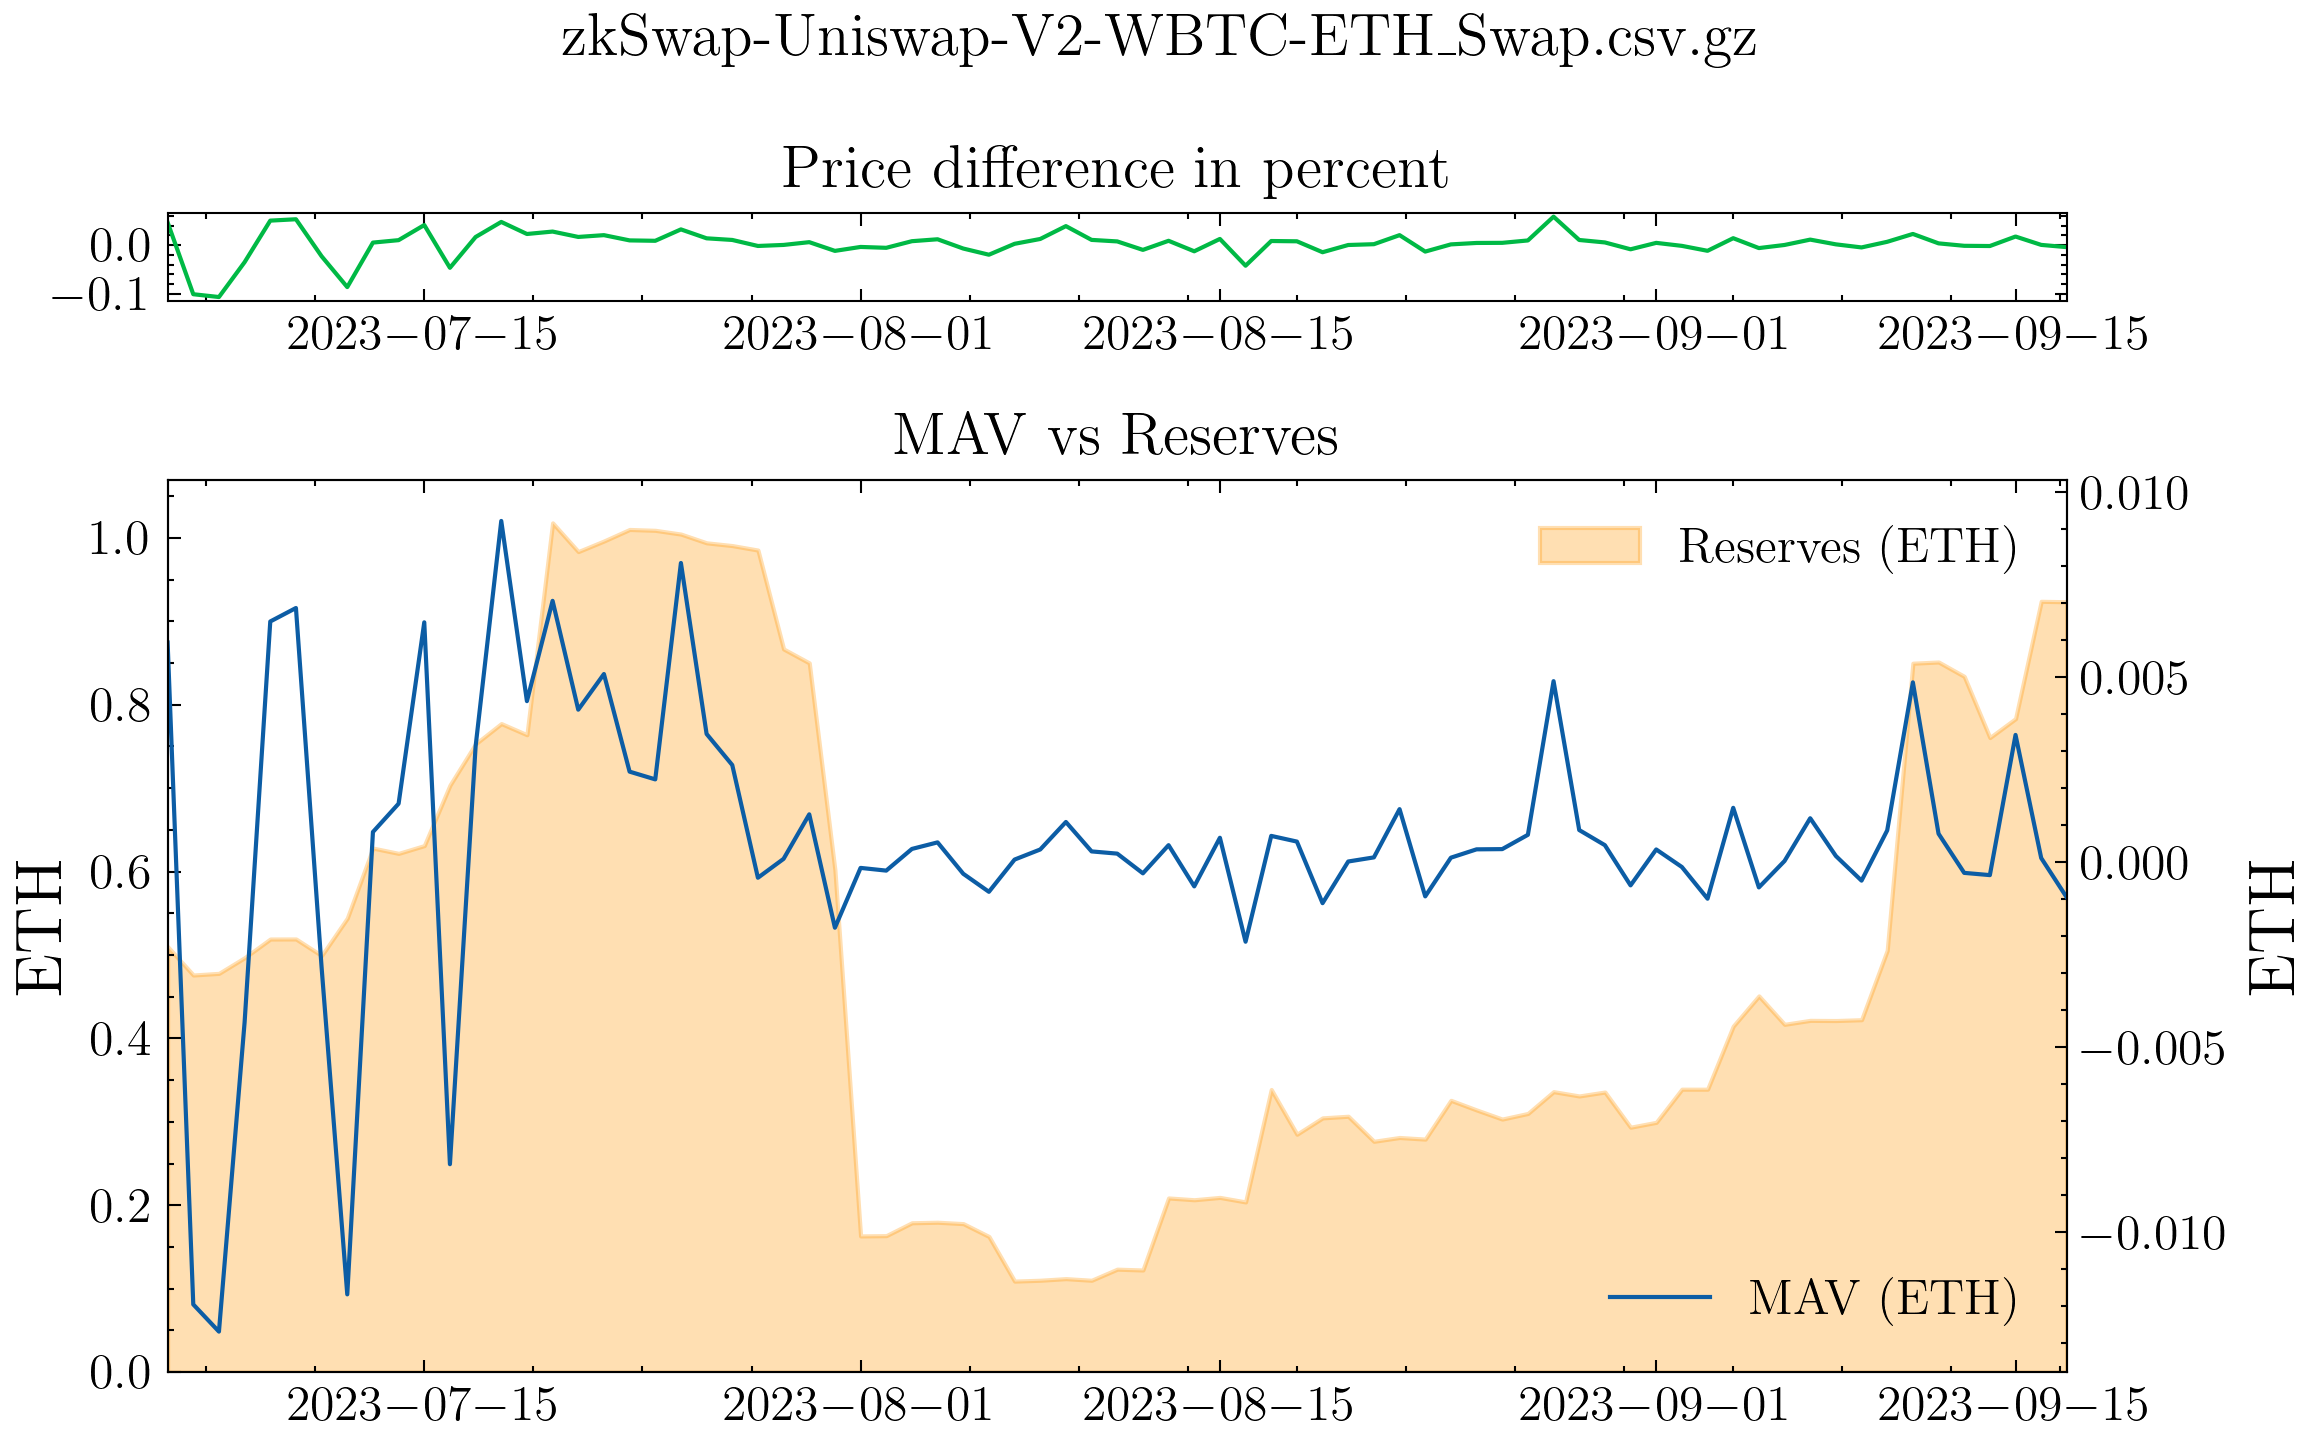

In [142]:
plt.style.use('https://raw.githubusercontent.com/garrettj403/SciencePlots/master/scienceplots/styles/science.mplstyle')

fig = plt.figure(figsize=(8,5))

gs1 = gridspec.GridSpec(5, 1)
ax1 = fig.add_subplot(gs1[0:1,0])
ax2 = fig.add_subplot(gs1[1:,0]) 
ax3 = ax2.twinx()

fig.suptitle(file1)

#ax1.plot(df_per_day['timestamp'], df_per_day['cum_MAV'], color ='C2')
ax1.plot(df_per_day['timestamp'], df_per_day['price_diff']/df_per_day['spot_price'], 
        color = 'C1',
        label = r'Price Difference (\%)')

ax2.fill_between(df_per_day['timestamp'],0, df_per_day['reserves_ETH'], 
        color ='C2', alpha =0.3,
        label = 'Reserves (ETH)')

ax3.plot(df_per_day['timestamp'], df_per_day['MAV'],
        label = 'MAV (ETH)')
#.rolling(window).var() 

ax2.set_ylim(0)
for a in [ax1, ax2]:
    a.set_xlim(min(df_per_day.timestamp),max(df_per_day.timestamp))

ax1.set_ylabel('%')

ax2.set_ylabel('ETH')
ax3.set_ylabel('ETH')

ax1.set_title("Price difference in percent")
ax2.set_title("MAV vs Reserves")
#ax1.legend(loc=3)
ax3.legend(loc=4)
ax2.legend(loc=1)

gs1.tight_layout(fig)
plt.show()



In [83]:
print(gs1.get_geometry)

<bound method GridSpecBase.get_geometry of GridSpec(5, 1)>
